**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\GoMyCode\\titanic-passengers.csv', sep=';',encoding='unicode_escape')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [3]:
#Description of the dataset
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data['Age']=data['Age'].replace(np.NaN, data['Age'].mean())
data['Age'].isnull().sum()

0

In [5]:
data['Cabin']=data['Cabin'].replace(np.NaN, data['Cabin'].mode()[0])
data['Cabin']


0      B96 B98
1        F G73
2      B96 B98
3      B96 B98
4          B71
        ...   
886    B96 B98
887    B96 B98
888    B96 B98
889    B96 B98
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [6]:
data['Embarked']=data['Embarked'].dropna
data['Embarked'].isnull().sum()

0

In [7]:
cor=data.corr()
cor

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [8]:
data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
No,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
Yes,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


***Building our decision tree model for survival prediction***

1. Dealing with missing values and converting categorical data to numerical data


In [9]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(data)


2. Fitting the Model, Evaluating Result, and Visualizing Trees

In [10]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

<AxesSubplot:>

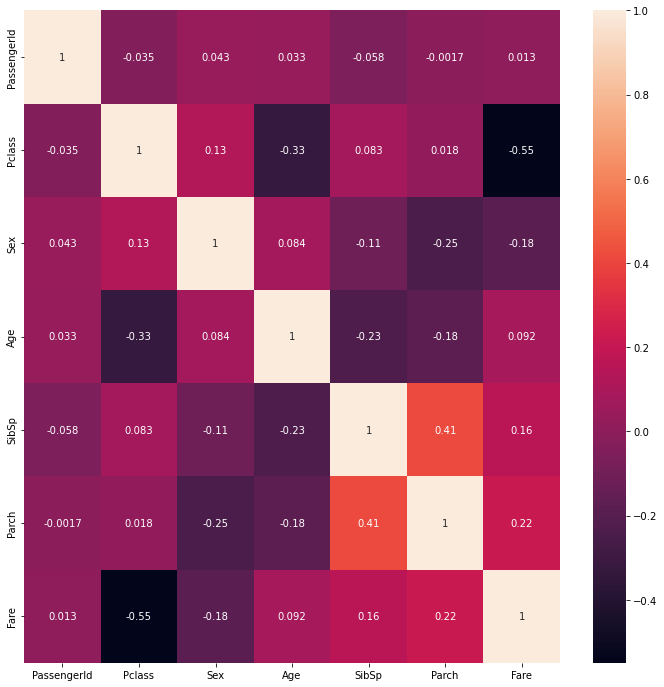

In [11]:
plt.figure(figsize=(12,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x.astype(float).corr(), linecolor='white', annot=True)

In [12]:
#splitting data: we will use 80% of data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

1. Entropy method

[Text(334.8, 380.52, 'X[2] <= 0.581\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(167.4, 271.8, 'X[1] <= 2.438\nentropy = 0.835\nsamples = 252\nvalue = [67, 185]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 1.644\nentropy = 0.297\nsamples = 133\nvalue = [7, 126]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.176\nsamples = 76\nvalue = [2, 74]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.429\nsamples = 57\nvalue = [5, 52]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 735.742\nentropy = 1.0\nsamples = 119\nvalue = [60, 59]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.999\nsamples = 101\nvalue = [49, 52]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 2.877\nentropy = 0.681\nsamples = 460\nvalue = [377, 83]'),
 Text(418.5, 163.07999999999998, 'X[1] <= 1.937\nentropy = 0.803\nsamples = 184\nvalue = [139, 45]'),
 Text(376.65000000000003, 54.360000000000014, 'en

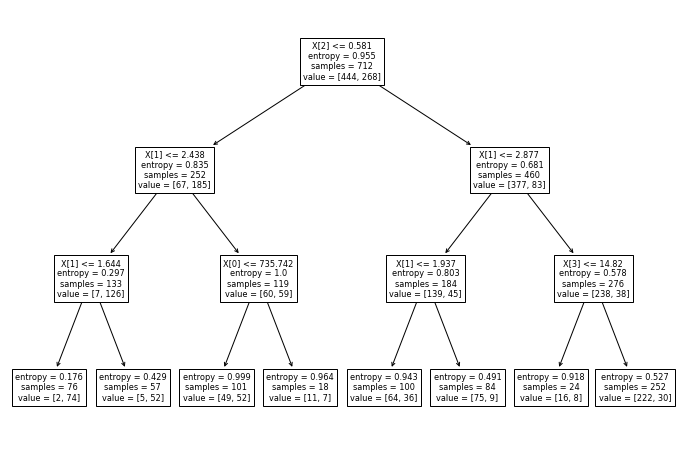

In [13]:
#applying Decision tree algorithm
model = tree.DecisionTreeClassifier(criterion='entropy', splitter='random',max_leaf_nodes=10, min_samples_leaf=5, max_depth=3, random_state=0)  

#fitting our model
model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
import matplotlib.pyplot as plt
from sklearn import tree
#Plotting our trees
plt.figure(figsize=(12,8))

tree.plot_tree(model.fit(x_train, y_train))

In [14]:
#evaluating our algorithm
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.770949720670391


In this case we use the entropy wich uses a logarithmic algorithm method and max_depth=5 wich is When left at default (None), nodes will be expanded until all leaves are pure or they contain samples less than the amount of min_samles_split.
So we obtained an accuracy=0.77.
In the next step w're going to change the method and the max_depth to see their impact on accuracy and the number of trees.

2. Gini method

[Text(273.92727272727274, 403.81714285714287, 'X[2] <= 0.581\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(121.74545454545455, 341.69142857142856, 'X[1] <= 2.438\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(60.872727272727275, 279.5657142857143, 'gini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(182.61818181818182, 279.5657142857143, 'gini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(426.1090909090909, 341.69142857142856, 'X[1] <= 2.877\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(304.3636363636364, 279.5657142857143, 'X[1] <= 1.937\ngini = 0.37\nsamples = 184\nvalue = [139, 45]'),
 Text(243.4909090909091, 217.44, 'X[0] <= 213.695\ngini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(182.61818181818182, 155.3142857142857, 'gini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(304.3636363636364, 155.3142857142857, 'X[3] <= 37.607\ngini = 0.483\nsamples = 76\nvalue = [45, 31]'),
 Text(243.4909090909091, 93.18857142857144, 'X[5] <= 0.164\ngini = 0.

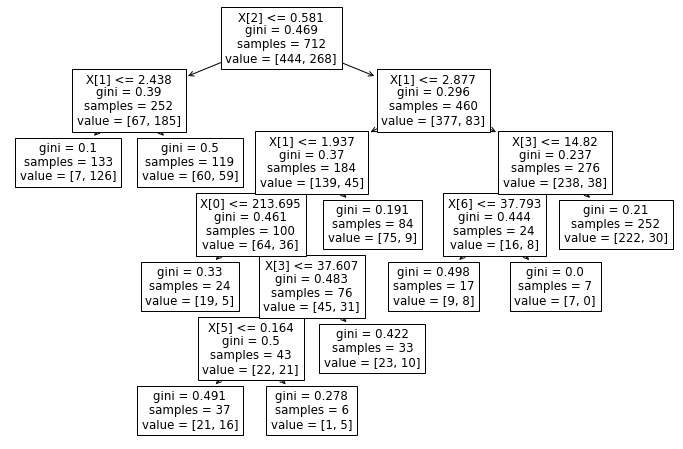

In [16]:
model = tree.DecisionTreeClassifier(criterion='gini', splitter='random',max_leaf_nodes=10, min_samples_leaf=5, max_depth=9, random_state=0)  
#fitting our model
model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
#plotting our model
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(x_train, y_train))

Let's try some other numbers of max_depth

In [15]:
from sklearn.preprocessing import OneHotEncoder

cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = 20
depth_range = range(1, max_attributes + 1)
# Testing max_depths from 1 to max attributes

for depth in depth_range:
    fold_accuracy = []
    model = tree.DecisionTreeClassifier(criterion='gini', splitter='random',max_leaf_nodes=10, min_samples_leaf=5, max_depth=depth, random_state=0)  
    #fitting our model
    model.fit(x_train, y_train)   
    y_pred=model.predict(x_test)  
df = pd.DataFrame({"Max Depth": depth_range, "Accuracy": "score:{}".format(accuracy_score(y_test, y_pred))})
df = df[["Max Depth", "Accuracy"]]
print(df.to_string(index=False))

 Max Depth                Accuracy
         1 score:0.776536312849162
         2 score:0.776536312849162
         3 score:0.776536312849162
         4 score:0.776536312849162
         5 score:0.776536312849162
         6 score:0.776536312849162
         7 score:0.776536312849162
         8 score:0.776536312849162
         9 score:0.776536312849162
        10 score:0.776536312849162
        11 score:0.776536312849162
        12 score:0.776536312849162
        13 score:0.776536312849162
        14 score:0.776536312849162
        15 score:0.776536312849162
        16 score:0.776536312849162
        17 score:0.776536312849162
        18 score:0.776536312849162
        19 score:0.776536312849162
        20 score:0.776536312849162


**entropy Vs Gini**

While entropy might have the upper hand in exploratory analysis, Gini can be advantageous for reduced false-classifications.
If we set max_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as we would like.

**Building our random forest model**

In [17]:
#applying random forest algorithm
RF = RandomForestClassifier(criterion='gini', n_estimators = 500, random_state = 42)
#fitting the model
RF.fit(x_train, y_train)
y_pred= RF.predict(x_test)      
#in this code I put a number of n_estimators =500

Here I will try a range of n_estimators to show their impact on accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
label_encoded_y = LabelEncoder().fit_transform(y)
n_estimators = range(10, 200, 10)
RF = RandomForestClassifier(criterion='gini', n_estimators = n_estimators, random_state = 42)

param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(RF, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x, label_encoded_y)
# summarize results
print("score:{}".format(accuracy_score(y_test, y_pred),grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("score:{}".format(accuracy_score(y_test, y_pred)), param)

We can see predict that the number of estimators can affect the accuracy of our model If we want to increase the accuracy of our model we might increase the number of trees.
I tried 
with n_estimators = 500 accuracy = 0.84
with n_estimators = 10000 accuracy = 0.86
But here because the n_estimators = 10000 took much time for execution I tried just wuth range of 200



**Confusion matrix**

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ["Not-Survived", "Survived"],
                           columns =["Predicted Not Survived", "Predicted Survived"])

confusion_mat

,Predicted Not Survived,Predicted Survived
Not-Survived,58,16
Survived,9,96


**Classification report**

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.87      0.78      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



**ROC evaluation**

I will use the ROC evaluation as another evaluation method

In [49]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )


ROC AUC on evaluation set 0.8395109395109395


C:\Users\Pc\AppData\Local\Temp/ipykernel_27788/404462583.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


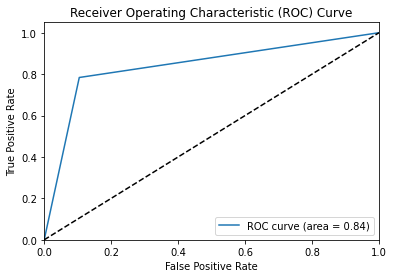

In [50]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

In this chack point we applied both decision tree algorithm and random forest algorithm to classify if a passenger on the Titanic is going to survive. 

From the accuracy of our models we can conclude that **random forest classifier** is the best choice for our case.